# INTELLIGENT RAIL

## Edward Jackson

##### Notebook 4 of 6 - Data EDA and cleaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We import the raw *monthly TGV punctuality* data:

In [3]:
data = pd.read_csv('data/monthlytgvpunctuality.csv', delimiter=';')

### Initial inspection of the data

In [4]:
# inspecting ALL columns
pd.set_option('display.max_columns', 500)
data.head()

,annee,mois,service_international_tgv,gare_de_depart_en_majuscules_sans_espaces_si_tiret,gare_d_arrivee_en_majuscules_sans_espaces_si_tiret,duree_moyenne_du_trajet_min_telle_que_prevue,nombre_de_circulations_prevues,nombre_de_trains_annules,commentaire_facultatif_annulations,nombre_de_trains_en_retard_au_depart,retard_moyen_des_trains_en_retard_au_depart_min,retard_moyen_de_tous_les_trains_au_depart_min,commentaire_facultatif_retards_au_depart,nombre_de_trains_en_retard_a_l_arrivee,retard_moyen_des_trains_en_retard_a_l_arrivee_min,retard_moyen_de_tous_les_trains_a_l_arrivee_min,commentaire_facultatif_retards_a_l_arrivee,externes,maintenance,trafic,materiel_roulant,gare,voyageurs,nombre_trains_en_retard_15min_si_liaison_concurrencee_par_vol,retard_moyen_trains_en_retard_15min_si_liaison_concurrencee_par_vol,nombre_trains_en_retard_30min,nombre_trains_en_retard_60min,periode,retard_pour_cause_externes,retard_a_cause_infrastructure_ferroviaire,retard_a_cause_gestion_gare,retard_a_cause_materiel_roulant,retard_a_cause_gestion_en_gare_et_reutilisation_de_materiel,retard_a_cause_prise_en_compte_voyageurs
0,2019,8.0,NaN,PARIS MONTPARNASSE,ANGOULEME,132.545775,289.0,5.0,NaN,172.0,3.208430,1.452230,NaN,29.0,26.590230,3.957981,NaN,0.310345,0.103448,0.172414,0.241379,0.103448,0.068966,17.0,37.029412,9.0,3.0,2019-08,31.034483,10.344828,17.241379,24.137931,10.344828,6.896552
1,2019,8.0,NaN,ANGOULEME,PARIS MONTPARNASSE,133.004464,224.0,0.0,NaN,165.0,3.288889,2.325967,NaN,26.0,16.042308,3.189658,NaN,0.166667,0.250000,0.208333,0.125000,0.083333,0.166667,12.0,21.208333,1.0,0.0,2019-08,16.666667,25.000000,20.833333,12.500000,8.333333,16.666667
2,2019,8.0,NaN,PARIS MONTPARNASSE,NANTES,132.026030,461.0,0.0,NaN,292.0,3.232192,1.845879,NaN,38.0,43.524561,4.515980,NaN,0.297297,0.459459,0.108108,0.108108,0.000000,0.027027,29.0,53.194253,22.0,9.0,2019-08,29.729730,45.945946,10.810811,10.810811,0.000000,2.702703
3,2019,8.0,NaN,PARIS MONTPARNASSE,POITIERS,99.101240,489.0,5.0,NaN,304.0,3.591009,1.885847,NaN,58.0,20.023563,2.806921,NaN,0.235294,0.196078,0.254902,0.215686,0.039216,0.058824,20.0,41.350000,9.0,6.0,2019-08,23.529412,19.607843,25.490196,21.568627,3.921569,5.882353
4,2019,8.0,NaN,PARIS MONTPARNASSE,QUIMPER,225.917431,218.0,0.0,NaN,131.0,5.535751,3.067966,NaN,13.0,38.000000,3.110092,NaN,0.166667,0.416667,0.083333,0.166667,0.000000,0.166667,13.0,38.000000,6.0,2.0,2019-08,16.666667,41.666667,8.333333,16.666667,0.000000,16.666667


In [5]:
data.shape

(8544, 34)

Observations from initial inspection can be summarised as follows:
- 8,544 rows of data
- 34 columns of data
- data type issues e.g. float in **mois** (*month*)
- NaN values in a number of columns
- duplicated information:
    - delay categories (e.g. signalling) in both decimal and percentage formats
    - **periode** is an aggregate of the month and year
- French language columns

First, we start by dropping six columns duplicating information about the cause of delays on each route: we drop the decimals and retain the percentages. Then, we simplify and translate the remaining column headings as we will be using them repeatedly over some weeks. For this, I use my own French language knowledge and, for the more technical features, the explanations on the data.sncf.com/explore/ site.

In [6]:
# dropping duplicated columns
data = data.drop(columns=['periode', 'externes', 'maintenance','trafic', 'materiel_roulant', 'gare', 'voyageurs'], axis=1)

In [7]:
# update data type in month column
data = data.astype({'mois':'int'})

In [8]:
# listing the original column headings
data.columns

Index(['annee', 'mois', 'service_international_tgv',
       'gare_de_depart_en_majuscules_sans_espaces_si_tiret',
       'gare_d_arrivee_en_majuscules_sans_espaces_si_tiret',
       'duree_moyenne_du_trajet_min_telle_que_prevue',
       'nombre_de_circulations_prevues', 'nombre_de_trains_annules',
       'commentaire_facultatif_annulations',
       'nombre_de_trains_en_retard_au_depart',
       'retard_moyen_des_trains_en_retard_au_depart_min',
       'retard_moyen_de_tous_les_trains_au_depart_min',
       'commentaire_facultatif_retards_au_depart',
       'nombre_de_trains_en_retard_a_l_arrivee',
       'retard_moyen_des_trains_en_retard_a_l_arrivee_min',
       'retard_moyen_de_tous_les_trains_a_l_arrivee_min',
       'commentaire_facultatif_retards_a_l_arrivee',
       'nombre_trains_en_retard_15min_si_liaison_concurrencee_par_vol',
       'retard_moyen_trains_en_retard_15min_si_liaison_concurrencee_par_vol',
       'nombre_trains_en_retard_30min', 'nombre_trains_en_retard_60min',
 

In [9]:
# directly renaming the columns in English
data.columns=['year','month','service',
               'departure_station',
               'arrival_station',
               'avg_time_mins',
               'expected_journeys','num_cancellations',
               'cancellations_info',
               'delayed_departures',
               'avg_delay_departure_late_trains_mins',
               'avg_delay_departure_all_trains_mins',
               'delayed_departures_info',
               'delayed_arrivals',
               'avg_delay_arrival_late_trains_mins',
               'avg_delay_arrival_all_trains_mins',
               'delayed_arrivals_info',
               'num_late_trains_15','avg_delay_15_mins',
              'num_late_trains_30','num_late_trains_60',
              'delay_external_cause_%','delay_maintenance_%',
              'delay_signalling_%','delay_rolling_stock_%',
              'delay_staffing_logistics_%','delay_passengers_%'          
              ]

### Declaring features that are redundant in this project

In the event that this project becomes a binary classification task, we will later derive a **target** based on a threshold of the following:

*(num_cancellations+delayed_arrivals) / expected_journeys*

i.e. number of cancellations or delays as a proportion of ALL journeys, per route.


If the project becomes a multi-label classification task, degrees of lateness will be predicted using the following columns:

- **delayed_arrivals**
- **num_late_trains_15**
- **num_late_trains_30**
- **num_late_trains_60**


There a few columns that cannot be used in either event given they would be too closely associated with the target AND we would want to limit the number of features to make any model portable for external use to make predictions *in the field*. Consequently, we drop columns as follows:

In [10]:
data = data.drop(columns=['avg_delay_departure_late_trains_mins',
                         'avg_delay_arrival_late_trains_mins',
                         'avg_delay_15_mins'])

In addition, we are only looking at domestic journeys so we will also drop all *International* services and, where **Service** is not labelled, routes with a non-French **Gare de départ** or **Gare d'arrivée**.

In [11]:
np.where(data['service']=='International', 1, 0).sum()

432

We see that there are 432 journeys flagegd as *International*.

In [12]:
# drop International journeys
data = data.loc[data['service']!='International']

In [13]:
data.shape

(8112, 24)

We have successful dropped those rows. Now, we look at the values remaining in the **service** column:

In [14]:
# value counts INCLUDING NaNs
data['service'].value_counts(dropna=False)

NaN         4512
National    3600
Name: service, dtype: int64

In [15]:
data[data['service'].isna()].sort_values(by=['year','month']).tail(10)

,year,month,service,departure_station,arrival_station,avg_time_mins,expected_journeys,num_cancellations,cancellations_info,delayed_departures,avg_delay_departure_all_trains_mins,delayed_departures_info,delayed_arrivals,avg_delay_arrival_all_trains_mins,delayed_arrivals_info,num_late_trains_15,num_late_trains_30,num_late_trains_60,delay_external_cause_%,delay_maintenance_%,delay_signalling_%,delay_rolling_stock_%,delay_staffing_logistics_%,delay_passengers_%
8534,2020,12,NaN,PARIS LYON,CHAMBERY CHALLES LES EAUX,181.500000,147.0,9.0,NaN,50.0,0.347826,NaN,10.0,1.748068,NaN,8.0,2.0,1.0,20.000000,30.000000,20.000000,30.000000,0.000000,0.0
8535,2020,12,NaN,PARIS LYON,MARSEILLE ST CHARLES,194.892857,383.0,19.0,NaN,80.0,0.586584,NaN,17.0,2.540385,NaN,17.0,8.0,2.0,52.941176,23.529412,5.882353,17.647059,0.000000,0.0
8536,2020,12,NaN,PARIS LYON,MULHOUSE VILLE,169.653846,219.0,11.0,NaN,75.0,0.979087,NaN,14.0,4.845112,NaN,14.0,8.0,3.0,50.000000,21.428571,0.000000,28.571429,0.000000,0.0
8537,2020,12,NaN,PARIS LYON,TOULON,240.670886,168.0,10.0,NaN,29.0,0.806646,NaN,11.0,1.791983,NaN,11.0,7.0,0.0,45.454545,27.272727,0.000000,18.181818,9.090909,0.0
8538,2020,12,NaN,MARSEILLE ST CHARLES,LYON PART DIEU,104.332117,291.0,17.0,NaN,200.0,1.485645,NaN,17.0,2.384002,NaN,10.0,3.0,1.0,11.764706,35.294118,29.411765,23.529412,0.000000,0.0
8539,2020,12,NaN,MONTPELLIER,LYON PART DIEU,113.709220,145.0,4.0,NaN,93.0,1.925887,NaN,17.0,4.712766,NaN,14.0,5.0,1.0,23.529412,41.176471,17.647059,17.647059,0.000000,0.0
8540,2020,12,NaN,PARIS LYON,GENEVE,187.050420,122.0,3.0,NaN,45.0,1.055602,NaN,9.0,2.474090,NaN,9.0,1.0,0.0,55.555556,22.222222,0.000000,11.111111,11.111111,0.0
8541,2020,12,NaN,MADRID,MARSEILLE ST CHARLES,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8542,2020,12,NaN,BARCELONA,PARIS LYON,316.000000,30.0,0.0,NaN,3.0,-3.063889,NaN,3.0,6.792222,NaN,3.0,2.0,1.0,66.666667,33.333333,0.000000,0.000000,0.000000,0.0
8543,2020,12,NaN,MARSEILLE ST CHARLES,MADRID,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Of the 4,512 NaN values in the **service** column, we can see examples above of both domestic and international departure and arrival stations. ***Please Note:*** From January 2018, the **Service** column was deprecated by SNCF. Therefore, in order to drop any remaining international journeys, we retain only rows where there is NO match to a list of non-French station names.

In [16]:
# defining the international stations as a list
foreign_stations = ['STUTTGART','GENEVE','ZURICH','FRANCFORT','MADRID','BARCELONA','ITALIE','LAUSANNE']

In [17]:
data = data[~data['departure_station'].isin(foreign_stations)]

In [18]:
data = data[~data["arrival_station"].isin(foreign_stations)]

In [19]:
data.shape

(7536, 24)

Now that we only have *Domestic* journeys remaining, we can drop the **Service** column:

In [20]:
data.drop(columns='service', inplace=True)

In [21]:
data.tail(10)

,year,month,departure_station,arrival_station,avg_time_mins,expected_journeys,num_cancellations,cancellations_info,delayed_departures,avg_delay_departure_all_trains_mins,delayed_departures_info,delayed_arrivals,avg_delay_arrival_all_trains_mins,delayed_arrivals_info,num_late_trains_15,num_late_trains_30,num_late_trains_60,delay_external_cause_%,delay_maintenance_%,delay_signalling_%,delay_rolling_stock_%,delay_staffing_logistics_%,delay_passengers_%
8530,2020,12,TOURCOING,BORDEAUX ST JEAN,298.809524,23.0,2.0,NaN,1.0,0.285714,NaN,NaN,1.962698,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8531,2020,12,AVIGNON TGV,PARIS LYON,166.300380,279.0,16.0,NaN,157.0,1.940621,NaN,16.0,0.957224,NaN,12.0,8.0,2.0,25.000000,25.000000,25.000000,12.500000,12.500000,0.0
8532,2020,12,PARIS LYON,BELLEGARDE (AIN),166.000000,142.0,6.0,NaN,51.0,0.903554,NaN,10.0,3.631373,NaN,9.0,1.0,0.0,50.000000,20.000000,0.000000,10.000000,20.000000,0.0
8533,2020,12,BELLEGARDE (AIN),PARIS LYON,166.653846,136.0,6.0,NaN,72.0,1.496667,NaN,4.0,0.551282,NaN,4.0,3.0,1.0,25.000000,25.000000,25.000000,25.000000,0.000000,0.0
8534,2020,12,PARIS LYON,CHAMBERY CHALLES LES EAUX,181.500000,147.0,9.0,NaN,50.0,0.347826,NaN,10.0,1.748068,NaN,8.0,2.0,1.0,20.000000,30.000000,20.000000,30.000000,0.000000,0.0
8535,2020,12,PARIS LYON,MARSEILLE ST CHARLES,194.892857,383.0,19.0,NaN,80.0,0.586584,NaN,17.0,2.540385,NaN,17.0,8.0,2.0,52.941176,23.529412,5.882353,17.647059,0.000000,0.0
8536,2020,12,PARIS LYON,MULHOUSE VILLE,169.653846,219.0,11.0,NaN,75.0,0.979087,NaN,14.0,4.845112,NaN,14.0,8.0,3.0,50.000000,21.428571,0.000000,28.571429,0.000000,0.0
8537,2020,12,PARIS LYON,TOULON,240.670886,168.0,10.0,NaN,29.0,0.806646,NaN,11.0,1.791983,NaN,11.0,7.0,0.0,45.454545,27.272727,0.000000,18.181818,9.090909,0.0
8538,2020,12,MARSEILLE ST CHARLES,LYON PART DIEU,104.332117,291.0,17.0,NaN,200.0,1.485645,NaN,17.0,2.384002,NaN,10.0,3.0,1.0,11.764706,35.294118,29.411765,23.529412,0.000000,0.0
8539,2020,12,MONTPELLIER,LYON PART DIEU,113.709220,145.0,4.0,NaN,93.0,1.925887,NaN,17.0,4.712766,NaN,14.0,5.0,1.0,23.529412,41.176471,17.647059,17.647059,0.000000,0.0


### Missing values

In [22]:
# checking for ANY missing values
data.isna().sum().sum()

21727

In [23]:
# summarising missing values by column
data.isna().sum()

year                                      0
month                                     0
departure_station                         0
arrival_station                           0
avg_time_mins                            46
expected_journeys                        46
num_cancellations                         0
cancellations_info                     7536
delayed_departures                        0
avg_delay_departure_all_trains_mins      46
delayed_departures_info                7536
delayed_arrivals                         75
avg_delay_arrival_all_trains_mins        46
delayed_arrivals_info                  5745
num_late_trains_15                       47
num_late_trains_30                       47
num_late_trains_60                       47
delay_external_cause_%                   85
delay_maintenance_%                      85
delay_signalling_%                       85
delay_rolling_stock_%                    85
delay_staffing_logistics_%               85
delay_passengers_%              

We can already see that 2 columns do not have ANY values. We take a look at **delayed_arrivals_info** (also badly affected) to get an impression of the sorts of data stored in these columns:

In [24]:
data['delayed_arrivals_info'][data['delayed_arrivals_info'].notna()].head(5)

101    Pendant les deux premières semaines d’août, le...
102    •bruit anormal sous caisse sur le OUIGO 7601 e...
105    •heurt d’une personne par le TER 17471 à Antib...
107    Ce mois-ci, cette destination a été touchée pa...
118    Ce mois-ci, l'OD a été touchée par les inciden...
Name: delayed_arrivals_info, dtype: object

It looks like this descriptive data would have been very valuable IF we were analysing every single journey separately. As we already have numerical data to describe the prevalence of specific causes of delay on each route - and with so much missing data here - we drop all 3 columns at this stage.

In [25]:
data = data.drop(columns=['cancellations_info','delayed_departures_info','delayed_arrivals_info'])

In [26]:
data.head()

,year,month,departure_station,arrival_station,avg_time_mins,expected_journeys,num_cancellations,delayed_departures,avg_delay_departure_all_trains_mins,delayed_arrivals,avg_delay_arrival_all_trains_mins,num_late_trains_15,num_late_trains_30,num_late_trains_60,delay_external_cause_%,delay_maintenance_%,delay_signalling_%,delay_rolling_stock_%,delay_staffing_logistics_%,delay_passengers_%
0,2019,8,PARIS MONTPARNASSE,ANGOULEME,132.545775,289.0,5.0,172.0,1.452230,29.0,3.957981,17.0,9.0,3.0,31.034483,10.344828,17.241379,24.137931,10.344828,6.896552
1,2019,8,ANGOULEME,PARIS MONTPARNASSE,133.004464,224.0,0.0,165.0,2.325967,26.0,3.189658,12.0,1.0,0.0,16.666667,25.000000,20.833333,12.500000,8.333333,16.666667
2,2019,8,PARIS MONTPARNASSE,NANTES,132.026030,461.0,0.0,292.0,1.845879,38.0,4.515980,29.0,22.0,9.0,29.729730,45.945946,10.810811,10.810811,0.000000,2.702703
3,2019,8,PARIS MONTPARNASSE,POITIERS,99.101240,489.0,5.0,304.0,1.885847,58.0,2.806921,20.0,9.0,6.0,23.529412,19.607843,25.490196,21.568627,3.921569,5.882353
4,2019,8,PARIS MONTPARNASSE,QUIMPER,225.917431,218.0,0.0,131.0,3.067966,13.0,3.110092,13.0,6.0,2.0,16.666667,41.666667,8.333333,16.666667,0.000000,16.666667


In [27]:
data.shape

(7536, 20)

Next, we turn our attention to missing values in numerical columns:

In [28]:
data.isna().sum()

year                                    0
month                                   0
departure_station                       0
arrival_station                         0
avg_time_mins                          46
expected_journeys                      46
num_cancellations                       0
delayed_departures                      0
avg_delay_departure_all_trains_mins    46
delayed_arrivals                       75
avg_delay_arrival_all_trains_mins      46
num_late_trains_15                     47
num_late_trains_30                     47
num_late_trains_60                     47
delay_external_cause_%                 85
delay_maintenance_%                    85
delay_signalling_%                     85
delay_rolling_stock_%                  85
delay_staffing_logistics_%             85
delay_passengers_%                     85
dtype: int64

At this point, we see the number of missing values has reduced dramatically. We consider whether there are any years which were especially affected, particularly with the pandemic of 2020 in mind:

In [29]:
data.isna().any(axis=1).groupby(data['year']).agg('sum')

year
2015     1
2016     0
2017     1
2018     8
2019     6
2020    70
dtype: int64

We do see that the vast majority of missing values appear to be attributed to 2020. Given that this was the year of the COVID-19 pandemic and services were hugely disrupted, this is hardly surprising and remaining data will not be representative of a 'normal' pattern of service.

We will take a look at which months in 2020 had most missing data. If - as expected - January and February are largely unaffected, we will drop ALL data for March 2020 onwards as not being representative of 'normal' service and unsuitable for the purposes of predictive modelling.

In [30]:
data[data.year==2020].isna().any(axis=1).groupby(data['month']).agg('sum')

month
1      0
2      0
3      1
4     49
5      9
6      5
7      0
8      0
9      0
10     0
11     5
12     1
dtype: int64

In [31]:
data.groupby('year')['expected_journeys'].sum()

year
2015    368599.0
2016    355791.0
2017    370629.0
2018    391412.0
2019    356252.0
2020    250144.0
Name: expected_journeys, dtype: float64

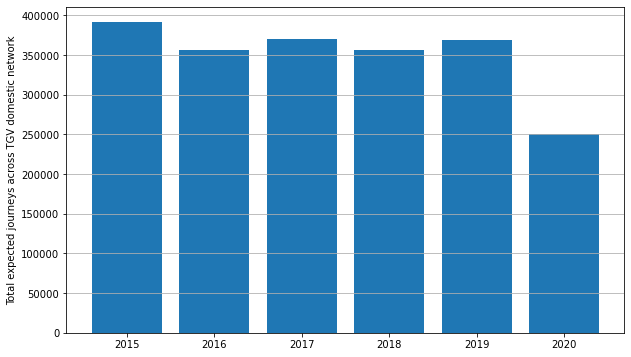

In [32]:
plt.figure(figsize=(10,6))
plt.bar(data['year'].unique(), data.groupby('year')['expected_journeys'].sum(), color='C0')
plt.ylabel('Total expected journeys across TGV domestic network')
plt.grid(axis='y')
plt.show()

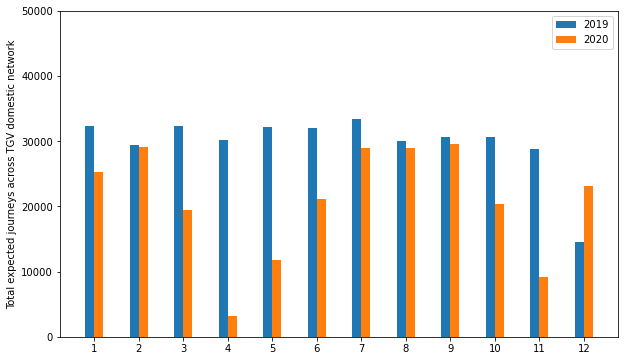

In [33]:
x = np.arange(1,13)
width=0.2

plt.figure(figsize=(10,6))
plt.bar(x-0.1, data[data.year==2019].groupby('month')['expected_journeys'].sum(),
        color='C0', width=width, label='2019')
plt.bar(x+0.1, data[data.year==2020].groupby('month')['expected_journeys'].sum(),
        color='C1', width=width, label='2020')
plt.xticks(x)
plt.ylabel('Total expected journeys across TGV domestic network')
plt.ylim(0,50000)
plt.legend()
plt.show()

We can see quite clearly that there was significant disruption to schedules in 2020. After relatively stable 'expected journeys' in the preceding years, we see that there was significant drop in 2020 to the tune of ~12,000. The schedule was also devastated in April 2020; a quick internet search showed that the TGV schedule was just 7% of 'normal'.

There are only two rows with missing data for January-March 2020. We know that France went into lockdown in mid-March. Therefore, as commented earlier, we will drop ALL data from April 2020 onwards:

In [34]:
pandemic = data[(data['year']==2020) & (data['month']>3)].index
data.drop(pandemic, inplace=True)

In [35]:
data.shape

(6573, 20)

In [36]:
data.isna().sum()

year                                    0
month                                   0
departure_station                       0
arrival_station                         0
avg_time_mins                           0
expected_journeys                       0
num_cancellations                       0
delayed_departures                      0
avg_delay_departure_all_trains_mins     0
delayed_arrivals                       11
avg_delay_arrival_all_trains_mins       0
num_late_trains_15                      1
num_late_trains_30                      1
num_late_trains_60                      1
delay_external_cause_%                 16
delay_maintenance_%                    16
delay_signalling_%                     16
delay_rolling_stock_%                  16
delay_staffing_logistics_%             16
delay_passengers_%                     16
dtype: int64

In [37]:
data[data.isna().any(axis=1)]

,year,month,departure_station,arrival_station,avg_time_mins,expected_journeys,num_cancellations,delayed_departures,avg_delay_departure_all_trains_mins,delayed_arrivals,avg_delay_arrival_all_trains_mins,num_late_trains_15,num_late_trains_30,num_late_trains_60,delay_external_cause_%,delay_maintenance_%,delay_signalling_%,delay_rolling_stock_%,delay_staffing_logistics_%,delay_passengers_%
258,2018,12,TOURCOING,MARSEILLE ST CHARLES,304.000000,7.0,0.0,2.0,0.285714,NaN,0.740476,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
922,2018,5,TOURCOING,MARSEILLE ST CHARLES,309.000000,19.0,3.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1087,2017,2,NANTES,STRASBOURG,331.600000,36.0,1.0,5.0,2.301429,0.0,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1807,2018,3,MARSEILLE ST CHARLES,TOURCOING,302.000000,31.0,0.0,3.0,0.160215,NaN,2.387097,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2619,2018,9,RENNES,PARIS VAUGIRARD,116.000000,27.0,0.0,2.0,0.174074,0.0,-0.326543,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3375,2018,5,BELLEGARDE (AIN),PARIS LYON,163.438596,234.0,63.0,17.0,2.088694,45.0,10.779142,42.0,29.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
3995,2019,8,BORDEAUX ST JEAN,TOURCOING,299.000000,5.0,0.0,1.0,-0.226667,NaN,2.400000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4474,2019,5,MARSEILLE ST CHARLES,TOURCOING,303.000000,8.0,0.0,1.0,-0.508333,NaN,0.750000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6147,2018,4,MARSEILLE ST CHARLES,TOURCOING,301.833333,25.0,7.0,0.0,-0.370370,NaN,2.500000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6225,2018,4,RENNES,PARIS VAUGIRARD,111.000000,20.0,0.0,4.0,0.450000,NaN,0.710833,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


We see that the route from *PARIS EST* to *REIMS* is the only one to have missing data in 3 of the columns. Given that only 6 services were delayed at all in that month and the average delay of ALL services on that route in that month was just over half-a-minute, we can confidently imput **0** as the number of services delayed over 15, 30 and 60 minutes:

In [38]:
data.loc[6291,:] = data.loc[6291,:].fillna('0')

We also have a good number of routes with missing values in **delayed_arrivals**. A quick inspection above shows that all affected routes have very small average departure delays and arrivals (mostly less than one minute). Again, we can be confident in imputing **0** without distorting the data distribution too much:

In [39]:
data['delayed_arrivals'].fillna('0', inplace=True)

In [40]:
data.isna().sum()

year                                    0
month                                   0
departure_station                       0
arrival_station                         0
avg_time_mins                           0
expected_journeys                       0
num_cancellations                       0
delayed_departures                      0
avg_delay_departure_all_trains_mins     0
delayed_arrivals                        0
avg_delay_arrival_all_trains_mins       0
num_late_trains_15                      0
num_late_trains_30                      0
num_late_trains_60                      0
delay_external_cause_%                 16
delay_maintenance_%                    16
delay_signalling_%                     16
delay_rolling_stock_%                  16
delay_staffing_logistics_%             16
delay_passengers_%                     16
dtype: int64

And finally, we see that there is a pattern of 16 missing values in each of the six columns describing the delay reasons for particular routes. We take a look at examples where data for these features IS shown:

In [41]:
data[(data['departure_station']=='PARIS MONTPARNASSE') & (data['arrival_station']=='ANGOULEME')].head()

,year,month,departure_station,arrival_station,avg_time_mins,expected_journeys,num_cancellations,delayed_departures,avg_delay_departure_all_trains_mins,delayed_arrivals,avg_delay_arrival_all_trains_mins,num_late_trains_15,num_late_trains_30,num_late_trains_60,delay_external_cause_%,delay_maintenance_%,delay_signalling_%,delay_rolling_stock_%,delay_staffing_logistics_%,delay_passengers_%
0,2019,8,PARIS MONTPARNASSE,ANGOULEME,132.545775,289.0,5.0,172.0,1.452230,29.0,3.957981,17.0,9.0,3.0,31.034483,10.344828,17.241379,24.137931,10.344828,6.896552
214,2018,7,PARIS MONTPARNASSE,ANGOULEME,132.209756,231.0,26.0,45.0,2.940894,46.0,7.867317,31.0,8.0,3.0,9.090909,20.454545,18.181818,34.090909,4.545455,13.636364
228,2018,12,PARIS MONTPARNASSE,ANGOULEME,127.097378,270.0,3.0,33.0,1.500811,38.0,4.571848,19.0,10.0,3.0,13.157895,21.052632,28.947368,28.947368,2.631579,5.263158
360,2016,11,PARIS MONTPARNASSE,ANGOULEME,161.328025,316.0,2.0,25.0,1.847134,46.0,7.070064,34.0,19.0,10.0,28.888889,37.777778,20.000000,6.666667,4.444444,2.222222
437,2018,6,PARIS MONTPARNASSE,ANGOULEME,126.683060,226.0,43.0,15.0,1.746812,30.0,6.552277,16.0,7.0,2.0,10.000000,30.000000,33.333333,23.333333,0.000000,3.333333


We see that these columns do add up to 100% and clearly change from month to month.

In [42]:
temp = data[data.isna().any(axis=1)]

missing = temp.groupby(['departure_station','arrival_station']).size().reset_index()
missing

,departure_station,arrival_station,0
0,BELLEGARDE (AIN),PARIS LYON,1
1,BORDEAUX ST JEAN,TOURCOING,2
2,MARSEILLE ST CHARLES,TOURCOING,4
3,NANTES,STRASBOURG,1
4,RENNES,PARIS VAUGIRARD,2
5,STRASBOURG,NANTES,1
6,TOURCOING,BORDEAUX ST JEAN,2
7,TOURCOING,MARSEILLE ST CHARLES,3


There does not appear to be one single route affected significantly more than others. Assuming that are sufficient other rows available for each route, we will impute the mean values for each column on each route.

In [43]:
for i in range(0,len(missing)):
    number = len(data.loc[(data['departure_station']==missing.iloc[i,0]) & (data['arrival_station']==missing.iloc[i,1])])
    print(f'{missing.iloc[i,0]} to {missing.iloc[i,1]} = {number} journeys')

BELLEGARDE (AIN) to PARIS LYON = 63 journeys
BORDEAUX ST JEAN to TOURCOING = 27 journeys
MARSEILLE ST CHARLES to TOURCOING = 27 journeys
NANTES to STRASBOURG = 63 journeys
RENNES to PARIS VAUGIRARD = 12 journeys
STRASBOURG to NANTES = 63 journeys
TOURCOING to BORDEAUX ST JEAN = 27 journeys
TOURCOING to MARSEILLE ST CHARLES = 12 journeys


12 journeys is probably quite low for our needs. However, it is at least information that reflects the required route rather than imputing values from other routes. We proceed:

In [44]:
columns= ['delay_external_cause_%',
         'delay_maintenance_%',
         'delay_signalling_%',
         'delay_rolling_stock_%',
         'delay_staffing_logistics_%',
         'delay_passengers_%']

for i in range(0,len(missing)):
    departure = missing.iloc[i,0]
    arrival = missing.iloc[i,1]
    mask = (data['departure_station']==departure) & (data['arrival_station']==arrival)
    
    for cols in columns:
        #print(cols)
        filler = data.loc[mask,cols].mean()
        data.loc[mask,cols] = data.loc[mask,cols].fillna(filler)

We can check on of the affected rows from earlier by taking its index reference. We see that values have been imputed correctly:

In [45]:
data.loc[7106,:]

year                                                   2020
month                                                     3
departure_station                      MARSEILLE ST CHARLES
arrival_station                                   TOURCOING
avg_time_mins                                         295.0
expected_journeys                                      17.0
num_cancellations                                       2.0
delayed_departures                                      4.0
avg_delay_departure_all_trains_mins               -0.011111
delayed_arrivals                                          0
avg_delay_arrival_all_trains_mins                  2.666667
num_late_trains_15                                      0.0
num_late_trains_30                                      0.0
num_late_trains_60                                      0.0
delay_external_cause_%                             24.26501
delay_maintenance_%                               23.126294
delay_signalling_%                      

In [46]:
data.isna().sum()

year                                   0
month                                  0
departure_station                      0
arrival_station                        0
avg_time_mins                          0
expected_journeys                      0
num_cancellations                      0
delayed_departures                     0
avg_delay_departure_all_trains_mins    0
delayed_arrivals                       0
avg_delay_arrival_all_trains_mins      0
num_late_trains_15                     0
num_late_trains_30                     0
num_late_trains_60                     0
delay_external_cause_%                 0
delay_maintenance_%                    0
delay_signalling_%                     0
delay_rolling_stock_%                  0
delay_staffing_logistics_%             0
delay_passengers_%                     0
dtype: int64

We now have confirmation that there are no further missing values in our dataset.

### Data types

We take a look at the data types attributed to each column:

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6573 entries, 0 to 7570
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   year                                 6573 non-null   int64  
 1   month                                6573 non-null   int32  
 2   departure_station                    6573 non-null   object 
 3   arrival_station                      6573 non-null   object 
 4   avg_time_mins                        6573 non-null   float64
 5   expected_journeys                    6573 non-null   float64
 6   num_cancellations                    6573 non-null   float64
 7   delayed_departures                   6573 non-null   float64
 8   avg_delay_departure_all_trains_mins  6573 non-null   float64
 9   delayed_arrivals                     6573 non-null   object 
 10  avg_delay_arrival_all_trains_mins    6573 non-null   float64
 11  num_late_trains_15            

We see that there are some columns which can only contain integers which are incorrectly set to 'float' e.g. we can't accept 3.5 cancellations.

In [48]:
data = data.astype({'expected_journeys':'int',
                    'num_cancellations':'int',
                    'delayed_departures':'int',
                    'delayed_arrivals':'int',
                    'num_late_trains_15':'int',
                    'num_late_trains_30':'int',
                    'num_late_trains_60':'int'})

### Exploratory Data Analysis

Before importing preprocessed data from elsewhere, we take a more detailed look at our features so far, especially data distributions.

In [49]:
data.head()

,year,month,departure_station,arrival_station,avg_time_mins,expected_journeys,num_cancellations,delayed_departures,avg_delay_departure_all_trains_mins,delayed_arrivals,avg_delay_arrival_all_trains_mins,num_late_trains_15,num_late_trains_30,num_late_trains_60,delay_external_cause_%,delay_maintenance_%,delay_signalling_%,delay_rolling_stock_%,delay_staffing_logistics_%,delay_passengers_%
0,2019,8,PARIS MONTPARNASSE,ANGOULEME,132.545775,289,5,172,1.452230,29,3.957981,17,9,3,31.034483,10.344828,17.241379,24.137931,10.344828,6.896552
1,2019,8,ANGOULEME,PARIS MONTPARNASSE,133.004464,224,0,165,2.325967,26,3.189658,12,1,0,16.666667,25.000000,20.833333,12.500000,8.333333,16.666667
2,2019,8,PARIS MONTPARNASSE,NANTES,132.026030,461,0,292,1.845879,38,4.515980,29,22,9,29.729730,45.945946,10.810811,10.810811,0.000000,2.702703
3,2019,8,PARIS MONTPARNASSE,POITIERS,99.101240,489,5,304,1.885847,58,2.806921,20,9,6,23.529412,19.607843,25.490196,21.568627,3.921569,5.882353
4,2019,8,PARIS MONTPARNASSE,QUIMPER,225.917431,218,0,131,3.067966,13,3.110092,13,6,2,16.666667,41.666667,8.333333,16.666667,0.000000,16.666667


In [50]:
data.shape

(6573, 20)

In [51]:
data.isna().sum().sum()

0

So far, we know that there are 6,573 rows of data across 20 features. There are no longer any missing values and all remaining features are pertinent to the project, even if only as keys for joining other data shortly.

In [52]:
data['year'].sort_values().unique()

array([2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [53]:
data['month'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [54]:
data['departure_station'].sort_values().unique()

array(['AIX EN PROVENCE TGV', 'ANGERS SAINT LAUD', 'ANGOULEME', 'ANNECY',
       'ARRAS', 'AVIGNON TGV', 'BELLEGARDE (AIN)',
       'BESANCON FRANCHE COMTE TGV', 'BORDEAUX ST JEAN', 'BREST',
       'CHAMBERY CHALLES LES EAUX', 'DIJON VILLE', 'DOUAI', 'DUNKERQUE',
       'GRENOBLE', 'LA ROCHELLE VILLE', 'LAVAL',
       'LE CREUSOT MONTCEAU MONTCHANIN', 'LE MANS', 'LILLE',
       'LYON PART DIEU', 'MACON LOCHE', 'MARNE LA VALLEE',
       'MARSEILLE ST CHARLES', 'METZ', 'MONTPELLIER', 'MULHOUSE VILLE',
       'NANCY', 'NANTES', 'NICE VILLE', 'NIMES', 'PARIS EST',
       'PARIS LYON', 'PARIS MONTPARNASSE', 'PARIS NORD',
       'PARIS VAUGIRARD', 'PERPIGNAN', 'POITIERS', 'QUIMPER', 'REIMS',
       'RENNES', 'SAINT ETIENNE CHATEAUCREUX', 'ST MALO',
       'ST PIERRE DES CORPS', 'STRASBOURG', 'TOULON', 'TOULOUSE MATABIAU',
       'TOURCOING', 'TOURS', 'VALENCE ALIXAN TGV', 'VANNES'], dtype=object)

In [55]:
data['arrival_station'].sort_values().unique()

array(['AIX EN PROVENCE TGV', 'ANGERS SAINT LAUD', 'ANGOULEME', 'ANNECY',
       'ARRAS', 'AVIGNON TGV', 'BELLEGARDE (AIN)',
       'BESANCON FRANCHE COMTE TGV', 'BORDEAUX ST JEAN', 'BREST',
       'CHAMBERY CHALLES LES EAUX', 'DIJON VILLE', 'DOUAI', 'DUNKERQUE',
       'GRENOBLE', 'LA ROCHELLE VILLE', 'LAVAL',
       'LE CREUSOT MONTCEAU MONTCHANIN', 'LE MANS', 'LILLE',
       'LYON PART DIEU', 'MACON LOCHE', 'MARNE LA VALLEE',
       'MARSEILLE ST CHARLES', 'METZ', 'MONTPELLIER', 'MULHOUSE VILLE',
       'NANCY', 'NANTES', 'NICE VILLE', 'NIMES', 'PARIS EST',
       'PARIS LYON', 'PARIS MONTPARNASSE', 'PARIS NORD',
       'PARIS VAUGIRARD', 'PERPIGNAN', 'POITIERS', 'QUIMPER', 'REIMS',
       'RENNES', 'SAINT ETIENNE CHATEAUCREUX', 'ST MALO',
       'ST PIERRE DES CORPS', 'STRASBOURG', 'TOULON', 'TOULOUSE MATABIAU',
       'TOURCOING', 'TOURS', 'VALENCE ALIXAN TGV', 'VANNES'], dtype=object)

Above, we see that data is taken from 2015 to 2020 and all months are represented. The list of departure stations matches the list of arrival stations.

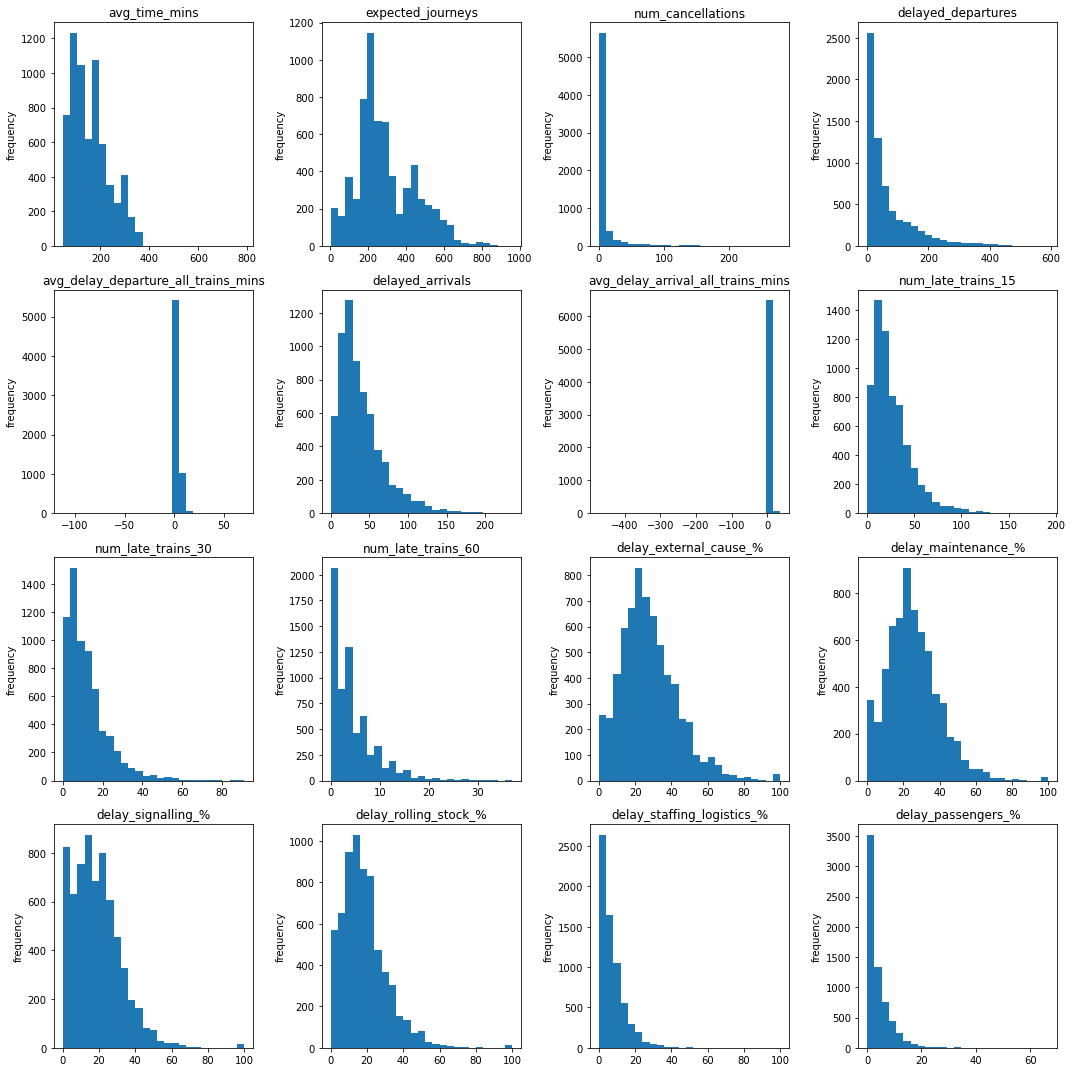

In [56]:
plt.subplots(4,4, figsize=(15,15))

for i in range(0, len(data.columns)-4):     # we've already explored the first four columns
    plt.subplot(4,4,i+1)
    plt.hist(data.iloc[:,i+4], bins=25)
    plt.title(data.columns[i+4])
    plt.ylabel('frequency')

plt.tight_layout()

These basic distribution plots give us quite an insight which we can summarise as follows (note that axis scales are automatic):
- **avg_train_mins** - there appears to be a heavy right skew and ~2000 journeys of up to 1.5 hours (will check for errors in recording and research longest and shortest journeys online)
- **expected_journeys** - this feature appears to follow a fairly normal distribution, possibly with a slight right skew
- **num_cancellations** - the mode is certainly between 0-15 cancellations in a route/month (outliers need to be investigated)
- **delayed_departures** - heavy right skew (**delayed_arrivals** is very similar but shifted to the right by about 20 minutes - it seems intuitive that there should be collinearity between these two features)
- **avg_delay_departure_all_trains_mins** & **avg_delay_arrival_all_trains_mins** - most values at 0-5 minutes (very high and very low outliers need to be investigated, average of 100 minutes early seems unlikely)
- **num_late_trains_15**, **num_late_trains_30** & **num_late_trains_60** - heavily right skewed (nothing unexpected here given they are all degrees of delay)
- The remaining features describing causes of delays in a route/month indicate that delay causes are generally equally split between external, maintenance, signalling and rolling stock, with lesser proportions relating to passengers and/or staffing logistics.

In [57]:
def boxplot(column):
    
    """
    Boxplot automator
    
    Parameters:
    column: in format dataframe['column name']
    
    Returns:
    matplotlib boxplot
    
    """
    
    plt.figure(figsize=(10,2))
    plt.boxplot(column, vert=False)
    plt.show()

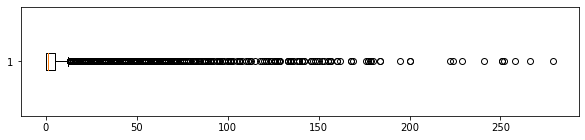

In [58]:
boxplot(data['num_cancellations'])

There are a large number of outliers here.

In [59]:
data[data['num_cancellations']>150]

,year,month,departure_station,arrival_station,avg_time_mins,expected_journeys,num_cancellations,delayed_departures,avg_delay_departure_all_trains_mins,delayed_arrivals,avg_delay_arrival_all_trains_mins,num_late_trains_15,num_late_trains_30,num_late_trains_60,delay_external_cause_%,delay_maintenance_%,delay_signalling_%,delay_rolling_stock_%,delay_staffing_logistics_%,delay_passengers_%
489,2018,5,RENNES,PARIS MONTPARNASSE,98.917874,614,200,45,2.373510,89,5.138446,36,11,5,36.923077,20.000000,15.384615,18.461538,3.076923,6.153846
496,2018,4,LILLE,PARIS NORD,63.819477,616,195,121,1.931591,103,3.813064,26,6,0,14.130435,29.347826,30.434783,17.391304,6.521739,2.173913
499,2018,4,AVIGNON TGV,PARIS LYON,159.398148,608,176,160,4.523881,55,4.549498,42,25,8,30.769231,19.230769,21.153846,21.153846,3.846154,3.846154
856,2018,5,MARSEILLE ST CHARLES,LYON PART DIEU,106.398515,584,180,33,2.240759,80,8.139604,52,18,9,48.000000,10.666667,24.000000,8.000000,4.000000,5.333333
916,2018,4,PARIS NORD,LILLE,67.605140,650,222,115,2.804206,97,4.223871,36,14,5,19.318182,21.590909,23.863636,21.590909,10.227273,3.409091
1336,2018,7,BORDEAUX ST JEAN,PARIS MONTPARNASSE,146.925419,817,160,337,8.462963,185,12.610299,133,64,30,22.093023,37.209302,17.441860,9.883721,6.976744,6.395349
1750,2018,4,PARIS LYON,VALENCE ALIXAN TGV,130.805907,415,178,48,3.012307,27,3.948101,22,8,1,18.518519,7.407407,11.111111,48.148148,14.814815,0.000000
1817,2018,5,PARIS MONTPARNASSE,RENNES,98.769585,618,184,23,0.858564,50,2.575653,21,3,0,22.222222,19.444444,13.888889,33.333333,5.555556,5.555556
2041,2018,4,ARRAS,PARIS NORD,51.388128,372,153,100,4.643836,77,7.199391,25,11,4,13.846154,30.769231,46.153846,6.153846,3.076923,0.000000
2205,2018,4,NANTES,PARIS MONTPARNASSE,129.057221,522,155,136,1.899955,51,4.974478,34,6,1,27.659574,21.276596,23.404255,19.148936,4.255319,4.255319


We can see that ALL the routes affected by 150 or more cancellations were listed between April and July 2018. Quick research online highlights that the rail network was heavily disrupted during this period due to 'alternating' strikes. As these affected the whole network, we are not knowingly introducing bias by retaining this information.

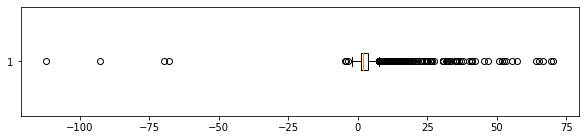

In [60]:
boxplot(data['avg_delay_departure_all_trains_mins'])

Interestingly, there appear to be four route/months whose average delay is significantly negative: services departing ~1-2 hours early!

In [61]:
data[data['avg_delay_departure_all_trains_mins']<-10]

,year,month,departure_station,arrival_station,avg_time_mins,expected_journeys,num_cancellations,delayed_departures,avg_delay_departure_all_trains_mins,delayed_arrivals,avg_delay_arrival_all_trains_mins,num_late_trains_15,num_late_trains_30,num_late_trains_60,delay_external_cause_%,delay_maintenance_%,delay_signalling_%,delay_rolling_stock_%,delay_staffing_logistics_%,delay_passengers_%
91,2019,10,VALENCE ALIXAN TGV,PARIS LYON,137.688976,265,11,221,-67.953740,68,-68.928084,46,28,12,25.373134,41.791045,22.388060,4.477612,2.985075,2.985075
6810,2019,10,NIMES,PARIS LYON,182.543307,266,12,203,-92.768307,70,-90.630840,51,31,14,26.086957,43.478261,21.739130,4.347826,1.449275,2.898551
6849,2019,11,VALENCE ALIXAN TGV,PARIS LYON,135.396396,233,11,195,-69.838288,51,-71.528829,35,13,3,44.000000,24.000000,16.000000,12.000000,4.000000,0.000000
7062,2019,11,NIMES,PARIS LYON,224.227907,226,11,190,-112.262016,63,-151.291008,44,18,3,46.774194,17.741935,14.516129,12.903226,3.225806,4.838710


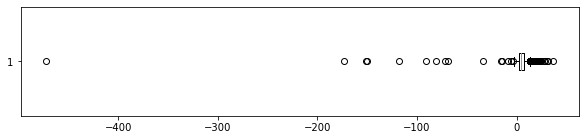

In [62]:
boxplot(data['avg_delay_arrival_all_trains_mins'])

In [63]:
early_arrival = data[data['avg_delay_arrival_all_trains_mins']<0]
early_arrival

,year,month,departure_station,arrival_station,avg_time_mins,expected_journeys,num_cancellations,delayed_departures,avg_delay_departure_all_trains_mins,delayed_arrivals,avg_delay_arrival_all_trains_mins,num_late_trains_15,num_late_trains_30,num_late_trains_60,delay_external_cause_%,delay_maintenance_%,delay_signalling_%,delay_rolling_stock_%,delay_staffing_logistics_%,delay_passengers_%
91,2019,10,VALENCE ALIXAN TGV,PARIS LYON,137.688976,265,11,221,-67.953740,68,-68.928084,46,28,12,25.373134,41.791045,22.388060,4.477612,2.985075,2.985075
542,2015,10,PARIS EST,NANCY,96.733788,293,0,12,0.713311,10,-0.006826,5,1,0,30.000000,20.000000,10.000000,30.000000,0.000000,10.000000
612,2017,5,LILLE,PARIS NORD,66.863799,558,0,26,1.028674,34,-1.254480,11,6,0,35.714286,14.285714,14.285714,28.571429,7.142857,0.000000
696,2015,3,REIMS,PARIS EST,46.854460,213,0,2,0.525822,10,-0.727700,2,1,0,55.555556,0.000000,33.333333,0.000000,11.111111,0.000000
697,2015,3,ANNECY,PARIS LYON,225.607735,181,0,1,0.093923,6,-0.276243,6,2,0,16.666667,0.000000,66.666667,0.000000,0.000000,16.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7059,2019,11,PARIS LYON,MONTPELLIER,233.227642,138,15,38,1.901355,19,-15.192547,19,8,4,42.105263,10.526316,10.526316,31.578947,5.263158,0.000000
7062,2019,11,NIMES,PARIS LYON,224.227907,226,11,190,-112.262016,63,-151.291008,44,18,3,46.774194,17.741935,14.516129,12.903226,3.225806,4.838710
7242,2020,2,STRASBOURG,NANTES,332.303030,33,0,27,1.947980,1,-1.059091,1,0,0,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000
7403,2019,12,PARIS NORD,LILLE,82.175497,367,65,285,11.812528,45,-15.098675,19,10,7,47.619048,11.904762,14.285714,19.047619,7.142857,0.000000


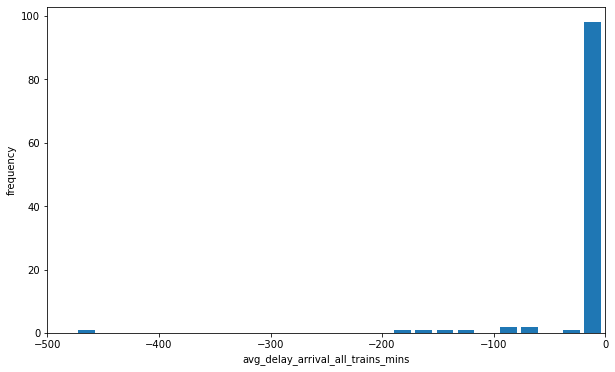

In [64]:
early_arrival = data[data['avg_delay_arrival_all_trains_mins']<0]

plt.figure(figsize=(10,6))
plt.hist(early_arrival['avg_delay_arrival_all_trains_mins'], bins=25, width=15, color='C0')
plt.xlim(-500,0)
plt.xlabel('avg_delay_arrival_all_trains_mins')
plt.ylabel('frequency')
plt.show()

We see that most services with *negative delay* (i.e. early arrival) are between 0-20 minutes early on average. However, it is implausible that services on any one route could AVERAGE much earlier than that. We take a look at the route(s) associated with the -480 to -460 bin above:

In [65]:
data[data['avg_delay_arrival_all_trains_mins']<-450]

,year,month,departure_station,arrival_station,avg_time_mins,expected_journeys,num_cancellations,delayed_departures,avg_delay_departure_all_trains_mins,delayed_arrivals,avg_delay_arrival_all_trains_mins,num_late_trains_15,num_late_trains_30,num_late_trains_60,delay_external_cause_%,delay_maintenance_%,delay_signalling_%,delay_rolling_stock_%,delay_staffing_logistics_%,delay_passengers_%
6866,2019,12,STRASBOURG,NANTES,786.5,10,4,6,1.244444,0,-472.638889,0,0,0,35.266602,23.001817,17.039737,17.172004,4.441884,3.077957


In [66]:
# number of routes with services departing more than 20 minutes early on average
len(data[data['avg_delay_arrival_all_trains_mins']<-20])

10

It really seems unlikely that journeys on a route that takes 6h10 on average (according to SNCF) is recorded as having average journey times of over 13 hours. Further, out of the 6 journeys that actually went ahead, ALL were delayed but arrivals were nearly 8 hours early! It seems that there may have been some recording errors further complicated by recurring industrial action in the late autumn and early winter of 2019 on some parts of the network. Not having worked in the industry, it would be difficult to draw further conclusions other than these figures perhaps introducing an immeasurable bias into our data.

Reluctantly, we drop the four routes associated with average early departures of more than 10 minutes and the 10 routes with average early arrivals of more than 20 minutes. This is undesirable with a relatively small dataset. However, imputing means would make values in other columns invalid e.g. number of delayed arrivals.

In [67]:
data = data[(data['avg_delay_departure_all_trains_mins']>=-10) & (data['avg_delay_arrival_all_trains_mins']>=-20)]

In [68]:
data.shape

(6563, 20)

We see that 6,563 rows remain which is probably a good result arising from this complex data cleaning process.

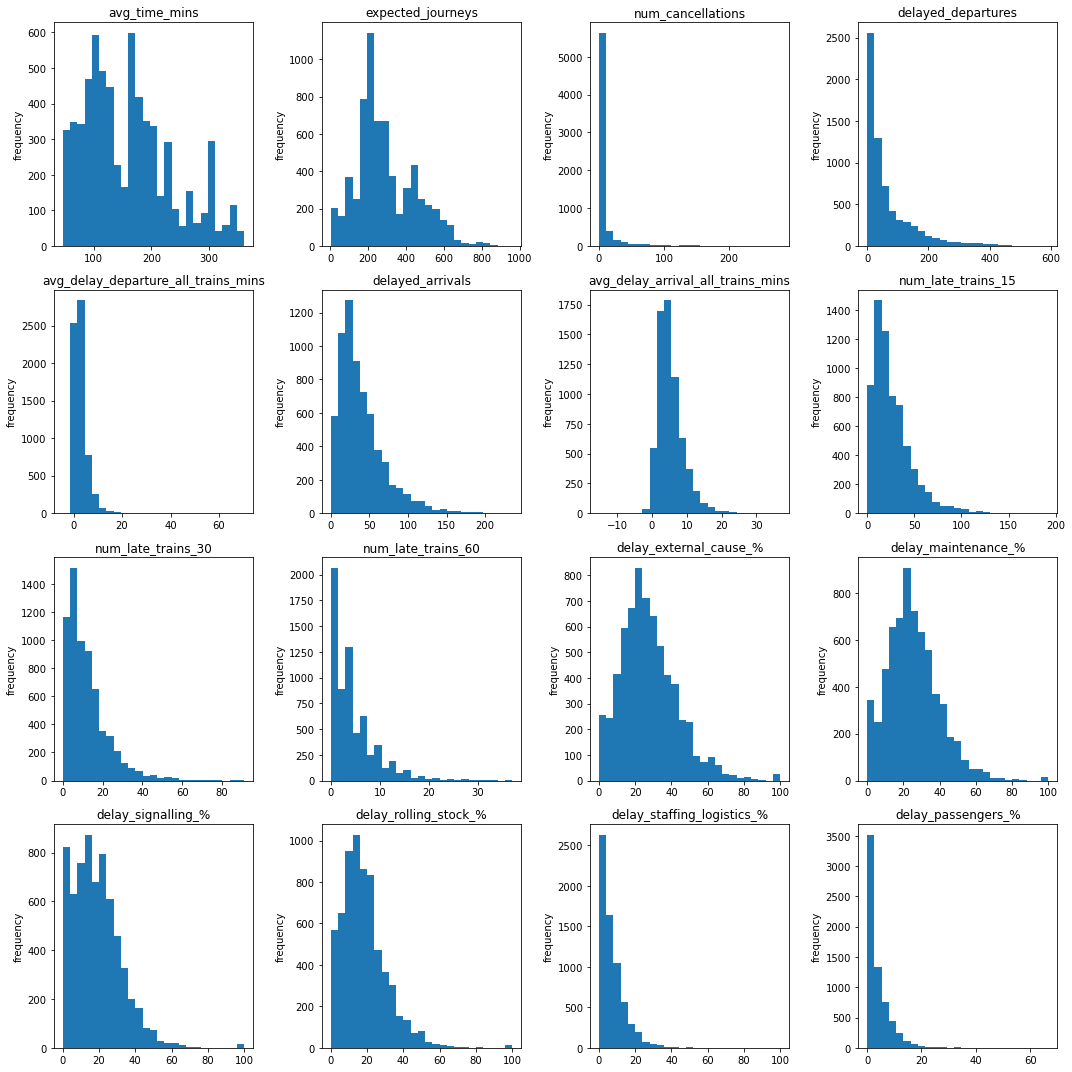

In [69]:
plt.subplots(4,4, figsize=(15,15))

for i in range(0, len(data.columns)-4):     # we've already explored the first four columns
    plt.subplot(4,4,i+1)
    plt.hist(data.iloc[:,i+4], bins=25)
    plt.title(data.columns[i+4])
    plt.ylabel('frequency')

plt.tight_layout()

We also see a more normal distribution for the **avg_delay_arrival_all_trains_mins** column especially, albeit with a right skew.

### Feature engineering (imports)

Next, we import the bespoke data defining each route in terms of distances, lines used and regions passed through.

In [70]:
add_features = pd.read_csv('data/labelled_route_features.csv')

In [71]:
add_features.head()

,Departure_Station,Arrival_Station,Route_Distance_km,Alsace,Aquitaine,Bourgogne,Bretagne,Centre,Champagne-Ardenne,Franche-Comté,Languedoc-Roussillon,Lorraine,Midi-Pyrénées,Nord-Pas-de-Calais,Pays de la Loire,Picardie,Poitou-Charentes,Provence-Alpes-Côte-d'Azur,Rhône-Alpes,Île-de-France,lg_1,lg_14,lg_216,lg_226,lg_226310,lg_262,lg_278,lg_301,lg_408,lg_420,lg_429,lg_431,lg_441,lg_450,lg_468,lg_470,lg_5,lg_515,lg_538,lg_566,lg_640,lg_677,lg_70,lg_750,lg_752,lg_752100,lg_768300,lg_830,lg_834,lg_850,lg_89,lg_890,lg_897,lg_900,lg_905,lg_930,avg_speed_restriction
0,PARIS MONTPARNASSE,ANGOULEME,390,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,247.777778
1,ANGOULEME,PARIS MONTPARNASSE,390,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,247.777778
2,PARIS MONTPARNASSE,NANTES,339,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,213.684524
3,PARIS MONTPARNASSE,POITIERS,292,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,247.777778
4,PARIS MONTPARNASSE,QUIMPER,485,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,218.208333


We see the data is neatly in order of routes so we can merge it (using the destination and arrival stations as keys) with our data above directly to create a features dataframe.

In [72]:
# merge datasets
features_df = pd.merge(data, add_features, how='left', left_on=['departure_station','arrival_station'], right_on=['Departure_Station','Arrival_Station'])

In [73]:
# drop duplicated keys
features_df.drop(columns=['Departure_Station','Arrival_Station'], inplace=True)

Next, we dummy encode each destination and arrival station, prefixing labels to make them obvious to the end-user.

In [74]:
features_df = pd.get_dummies(features_df, columns=["departure_station"], prefix=["dep_"] )

In [75]:
features_df = pd.get_dummies(features_df, columns=["arrival_station"], prefix=["arr_"] )

In [76]:
features_df.reset_index(drop=True, inplace=True)     # drop old index with missing indices and replace with consecutive index

In [77]:
# cleaning anomaly in region titles
features_df = features_df.rename(columns={'Rhône-Alpes':'Auvergne-Rhône-Alpes'})

Now we prepare empty columns into which we can import pre-collated maintenance data:

In [78]:
features_df[['comms_works','land_works','modernisation_works','other_works','overhead_works','signal_works','track_works']]=0

In [79]:
features_df.head()

,year,month,avg_time_mins,expected_journeys,num_cancellations,delayed_departures,avg_delay_departure_all_trains_mins,delayed_arrivals,avg_delay_arrival_all_trains_mins,num_late_trains_15,num_late_trains_30,num_late_trains_60,delay_external_cause_%,delay_maintenance_%,delay_signalling_%,delay_rolling_stock_%,delay_staffing_logistics_%,delay_passengers_%,Route_Distance_km,Alsace,Aquitaine,Bourgogne,Bretagne,Centre,Champagne-Ardenne,Franche-Comté,Languedoc-Roussillon,Lorraine,Midi-Pyrénées,Nord-Pas-de-Calais,Pays de la Loire,Picardie,Poitou-Charentes,Provence-Alpes-Côte-d'Azur,Auvergne-Rhône-Alpes,Île-de-France,lg_1,lg_14,lg_216,lg_226,lg_226310,lg_262,lg_278,lg_301,lg_408,lg_420,lg_429,lg_431,lg_441,lg_450,lg_468,lg_470,lg_5,lg_515,lg_538,lg_566,lg_640,lg_677,lg_70,lg_750,lg_752,lg_752100,lg_768300,lg_830,lg_834,lg_850,lg_89,lg_890,lg_897,lg_900,lg_905,lg_930,avg_speed_restriction,dep__AIX EN PROVENCE TGV,dep__ANGERS SAINT LAUD,dep__ANGOULEME,dep__ANNECY,dep__ARRAS,dep__AVIGNON TGV,dep__BELLEGARDE (AIN),dep__BESANCON FRANCHE COMTE TGV,dep__BORDEAUX ST JEAN,dep__BREST,dep__CHAMBERY CHALLES LES EAUX,dep__DIJON VILLE,dep__DOUAI,dep__DUNKERQUE,dep__GRENOBLE,dep__LA ROCHELLE VILLE,dep__LAVAL,dep__LE CREUSOT MONTCEAU MONTCHANIN,dep__LE MANS,dep__LILLE,dep__LYON PART DIEU,dep__MACON LOCHE,dep__MARNE LA VALLEE,dep__MARSEILLE ST CHARLES,dep__METZ,dep__MONTPELLIER,dep__MULHOUSE VILLE,dep__NANCY,dep__NANTES,dep__NICE VILLE,dep__NIMES,dep__PARIS EST,dep__PARIS LYON,dep__PARIS MONTPARNASSE,dep__PARIS NORD,dep__PARIS VAUGIRARD,dep__PERPIGNAN,dep__POITIERS,dep__QUIMPER,dep__REIMS,dep__RENNES,dep__SAINT ETIENNE CHATEAUCREUX,dep__ST MALO,dep__ST PIERRE DES CORPS,dep__STRASBOURG,dep__TOULON,dep__TOULOUSE MATABIAU,dep__TOURCOING,dep__TOURS,dep__VALENCE ALIXAN TGV,dep__VANNES,arr__AIX EN PROVENCE TGV,arr__ANGERS SAINT LAUD,arr__ANGOULEME,arr__ANNECY,arr__ARRAS,arr__AVIGNON TGV,arr__BELLEGARDE (AIN),arr__BESANCON FRANCHE COMTE TGV,arr__BORDEAUX ST JEAN,arr__BREST,arr__CHAMBERY CHALLES LES EAUX,arr__DIJON VILLE,arr__DOUAI,arr__DUNKERQUE,arr__GRENOBLE,arr__LA ROCHELLE VILLE,arr__LAVAL,arr__LE CREUSOT MONTCEAU MONTCHANIN,arr__LE MANS,arr__LILLE,arr__LYON PART DIEU,arr__MACON LOCHE,arr__MARNE LA VALLEE,arr__MARSEILLE ST CHARLES,arr__METZ,arr__MONTPELLIER,arr__MULHOUSE VILLE,arr__NANCY,arr__NANTES,arr__NICE VILLE,arr__NIMES,arr__PARIS EST,arr__PARIS LYON,arr__PARIS MONTPARNASSE,arr__PARIS NORD,arr__PARIS VAUGIRARD,arr__PERPIGNAN,arr__POITIERS,arr__QUIMPER,arr__REIMS,arr__RENNES,arr__SAINT ETIENNE CHATEAUCREUX,arr__ST MALO,arr__ST PIERRE DES CORPS,arr__STRASBOURG,arr__TOULON,arr__TOULOUSE MATABIAU,arr__TOURCOING,arr__TOURS,arr__VALENCE ALIXAN TGV,arr__VANNES,comms_works,land_works,modernisation_works,other_works,overhead_works,signal_works,track_works
0,2019,8,132.545775,289,5,172,1.452230,29,3.957981,17,9,3,31.034483,10.344828,17.241379,24.137931,10.344828,6.896552,390,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,247.777778,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2019,8,133.004464,224,0,165,2.325967,26,3.189658,12,1,0,16.666667,25.000000,20.833333,12.500000,8.333333,16.666667,390,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,247.777778,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2019,8,132.026030,461,0,292,1.845879,38,4.515980,29,22,9,29.729730,45.945946,10.810811,10.810811,0.000000,2.702703,339,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,213.684524,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0

We important the maintenance data prepared in another notebook.

In [80]:
maintenance = pd.read_csv('data/maintenance_finalised.csv')

We use the earlier mask for pandemic dates in order to drop these from our maintenance data also.

In [81]:
pandemic = maintenance[(maintenance['year']==2020) & (maintenance['month']>3)].index
maintenance.drop(pandemic, inplace=True)

In [82]:
maintenance.reset_index(drop=True, inplace=True)

Some last minute cleaning of region names:

In [83]:
maintenance['region'] = maintenance['region'].replace({'Rhône-Alpes':'Auvergne-Rhône-Alpes'})

In [84]:
maintenance['region'] = maintenance['region'].replace({'Auvergne':'Auvergne-Rhône-Alpes'})

In [85]:
maintenance['region'].unique()

array(['Auvergne-Rhône-Alpes', 'Franche-Comté', 'Bretagne',
       'Champagne-Ardenne', 'Bourgogne', 'Languedoc-Roussillon',
       'Lorraine', "Provence-Alpes-Côte-d'Azur", 'Île-de-France',
       'Pays de la Loire', 'Alsace', 'Midi-Pyrénées', 'Poitou-Charentes',
       'Aquitaine', 'Centre', 'Nord-Pas-de-Calais'], dtype=object)

We see that our French regions match those in the punctuality dataset.

In [86]:
maintenance.head()

,year,month,region,line_code,comms_works,land_works,modernisation_works,other_works,overhead_works,signal_works,track_works
0,2020,1,Auvergne-Rhône-Alpes,900000,0.0,0.0,0.0,82.0,17.0,17.0,32.0
1,2020,2,Auvergne-Rhône-Alpes,900000,0.0,0.0,0.0,79.0,21.0,16.0,35.0
2,2020,3,Auvergne-Rhône-Alpes,900000,0.0,8.0,0.0,184.0,42.0,17.0,44.0
3,2019,9,Auvergne-Rhône-Alpes,900000,0.0,0.0,0.0,154.0,69.0,77.0,71.0
4,2019,1,Auvergne-Rhône-Alpes,900000,0.0,0.0,0.0,120.0,12.0,10.0,13.0


We transform the line codes to make them compatible with other data.

In [87]:
maintenance['line_code'] = maintenance['line_code'].astype('str')

In [88]:
maintenance['line_code'] = maintenance['line_code'].str.replace('000','')

In [89]:
maintenance['line_code'] = 'lg_' + maintenance['line_code']

In [90]:
import warnings
from pandas.core.common import SettingWithCopyWarning

# counter the many warnings of copying to a slice
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

columns = features_df.columns[-7:]

for i in range(0,len(maintenance)):
    print(f'{i} out of {len(maintenance)}', end='\r')
    year = maintenance.loc[i,'year']
    month = maintenance.loc[i,'month']
    region = maintenance.loc[i,'region']
    line_code = maintenance.loc[i,'line_code']
    
    maintenance_detail_row = list(maintenance.iloc[i,-7:])
    
    
    mask = (features_df['year']==year) & (features_df['month']==month) & \
                          (features_df[region]==1) & (features_df[line_code]==1)
    features_df.update(features_df[mask][columns] + maintenance_detail_row)     

**Please note:** the previous step is far from elegant but it reliably extracts maintenance information by line and region, aggregating where multiple maintenance records. I accept that the process is inefficient and requires multiple passes of the data.

In [94]:
features_df.shape

(6563, 182)

In [95]:
# isolating maintenance columns for visualisation
maintenance_columns = features_df.columns[-7:]

In [96]:
maintenance_columns

Index(['comms_works', 'land_works', 'modernisation_works', 'other_works',
       'overhead_works', 'signal_works', 'track_works'],
      dtype='object')

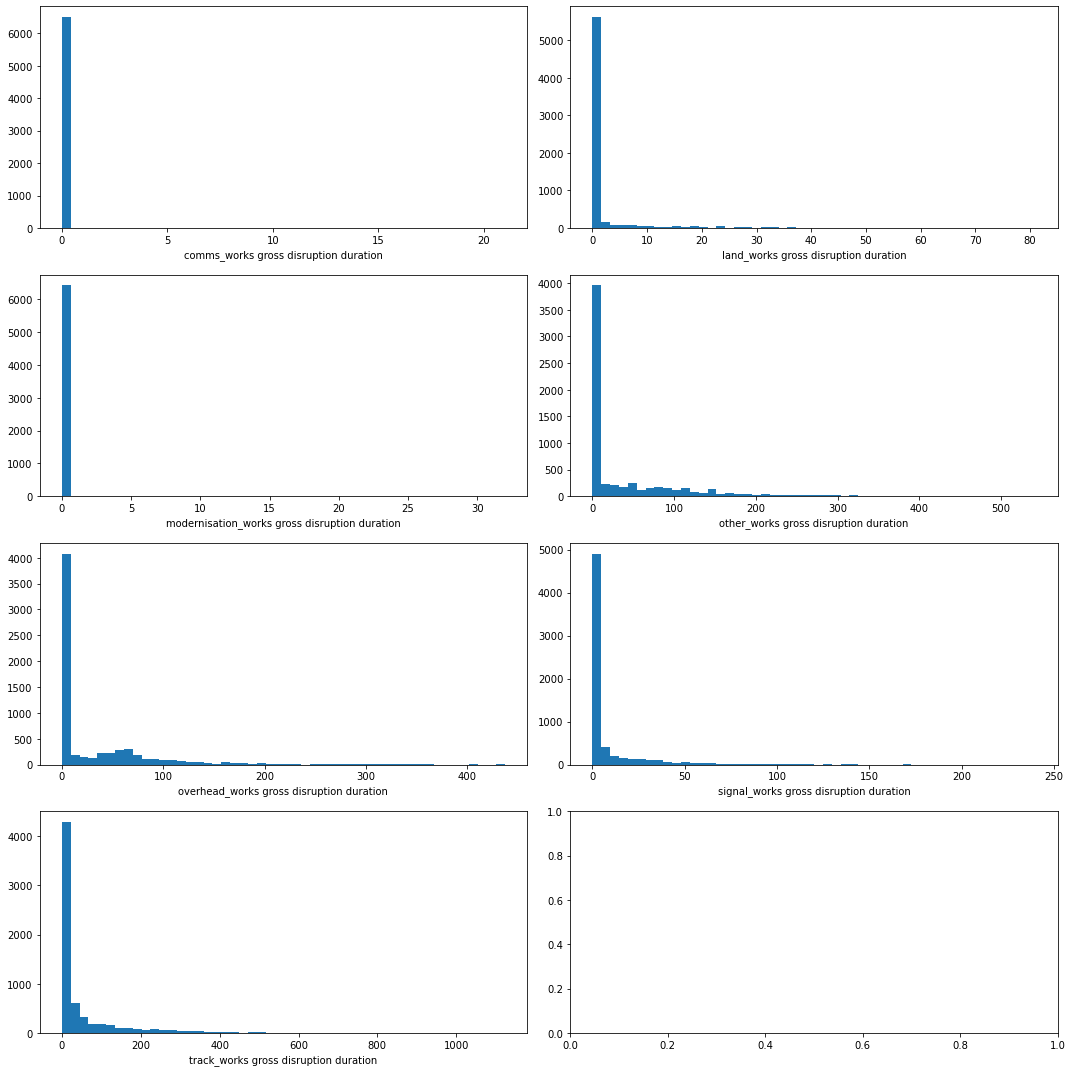

In [98]:
plt.subplots(4,2, figsize=(15,15))

for j in range(0,len(maintenance_columns)):
    plt.subplot(4,2,j+1)
    plt.hist(features_df[columns[j]], bins=50)
    plt.xlabel(f'{maintenance_columns[j]} gross disruption duration')
    
plt.tight_layout()

Albeit a basic visualisation, we see that most routes are unaffected by significant works. We would expect this to be the case. However, there are clearly disruptions now incorporated into our dataset. It will be interesting to see whether any of these disruptions contribute substantially to routes breaching the 10% delay threshold.

In [99]:
features_df.head()

,year,month,avg_time_mins,expected_journeys,num_cancellations,delayed_departures,avg_delay_departure_all_trains_mins,delayed_arrivals,avg_delay_arrival_all_trains_mins,num_late_trains_15,num_late_trains_30,num_late_trains_60,delay_external_cause_%,delay_maintenance_%,delay_signalling_%,delay_rolling_stock_%,delay_staffing_logistics_%,delay_passengers_%,Route_Distance_km,Alsace,Aquitaine,Bourgogne,Bretagne,Centre,Champagne-Ardenne,Franche-Comté,Languedoc-Roussillon,Lorraine,Midi-Pyrénées,Nord-Pas-de-Calais,Pays de la Loire,Picardie,Poitou-Charentes,Provence-Alpes-Côte-d'Azur,Auvergne-Rhône-Alpes,Île-de-France,lg_1,lg_14,lg_216,lg_226,lg_226310,lg_262,lg_278,lg_301,lg_408,lg_420,lg_429,lg_431,lg_441,lg_450,lg_468,lg_470,lg_5,lg_515,lg_538,lg_566,lg_640,lg_677,lg_70,lg_750,lg_752,lg_752100,lg_768300,lg_830,lg_834,lg_850,lg_89,lg_890,lg_897,lg_900,lg_905,lg_930,avg_speed_restriction,dep__AIX EN PROVENCE TGV,dep__ANGERS SAINT LAUD,dep__ANGOULEME,dep__ANNECY,dep__ARRAS,dep__AVIGNON TGV,dep__BELLEGARDE (AIN),dep__BESANCON FRANCHE COMTE TGV,dep__BORDEAUX ST JEAN,dep__BREST,dep__CHAMBERY CHALLES LES EAUX,dep__DIJON VILLE,dep__DOUAI,dep__DUNKERQUE,dep__GRENOBLE,dep__LA ROCHELLE VILLE,dep__LAVAL,dep__LE CREUSOT MONTCEAU MONTCHANIN,dep__LE MANS,dep__LILLE,dep__LYON PART DIEU,dep__MACON LOCHE,dep__MARNE LA VALLEE,dep__MARSEILLE ST CHARLES,dep__METZ,dep__MONTPELLIER,dep__MULHOUSE VILLE,dep__NANCY,dep__NANTES,dep__NICE VILLE,dep__NIMES,dep__PARIS EST,dep__PARIS LYON,dep__PARIS MONTPARNASSE,dep__PARIS NORD,dep__PARIS VAUGIRARD,dep__PERPIGNAN,dep__POITIERS,dep__QUIMPER,dep__REIMS,dep__RENNES,dep__SAINT ETIENNE CHATEAUCREUX,dep__ST MALO,dep__ST PIERRE DES CORPS,dep__STRASBOURG,dep__TOULON,dep__TOULOUSE MATABIAU,dep__TOURCOING,dep__TOURS,dep__VALENCE ALIXAN TGV,dep__VANNES,arr__AIX EN PROVENCE TGV,arr__ANGERS SAINT LAUD,arr__ANGOULEME,arr__ANNECY,arr__ARRAS,arr__AVIGNON TGV,arr__BELLEGARDE (AIN),arr__BESANCON FRANCHE COMTE TGV,arr__BORDEAUX ST JEAN,arr__BREST,arr__CHAMBERY CHALLES LES EAUX,arr__DIJON VILLE,arr__DOUAI,arr__DUNKERQUE,arr__GRENOBLE,arr__LA ROCHELLE VILLE,arr__LAVAL,arr__LE CREUSOT MONTCEAU MONTCHANIN,arr__LE MANS,arr__LILLE,arr__LYON PART DIEU,arr__MACON LOCHE,arr__MARNE LA VALLEE,arr__MARSEILLE ST CHARLES,arr__METZ,arr__MONTPELLIER,arr__MULHOUSE VILLE,arr__NANCY,arr__NANTES,arr__NICE VILLE,arr__NIMES,arr__PARIS EST,arr__PARIS LYON,arr__PARIS MONTPARNASSE,arr__PARIS NORD,arr__PARIS VAUGIRARD,arr__PERPIGNAN,arr__POITIERS,arr__QUIMPER,arr__REIMS,arr__RENNES,arr__SAINT ETIENNE CHATEAUCREUX,arr__ST MALO,arr__ST PIERRE DES CORPS,arr__STRASBOURG,arr__TOULON,arr__TOULOUSE MATABIAU,arr__TOURCOING,arr__TOURS,arr__VALENCE ALIXAN TGV,arr__VANNES,comms_works,land_works,modernisation_works,other_works,overhead_works,signal_works,track_works
0,2019,8,132.545775,289,5,172,1.452230,29,3.957981,17,9,3,31.034483,10.344828,17.241379,24.137931,10.344828,6.896552,390,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,247.777778,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019,8,133.004464,224,0,165,2.325967,26,3.189658,12,1,0,16.666667,25.000000,20.833333,12.500000,8.333333,16.666667,390,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,247.777778,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019,8,132.026030,461,0,292,1.845879,38,4.515980,29,22,9,29.729730,45.945946,10.810811,10.810811,0.000000,2.702703,339,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,213.684524,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

We export our finalised dataset ready for modelling:

In [100]:
features_df.to_csv('data/data_final.csv', index=False)